In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
! pip install tensorflow
! pip install keras
import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
pwd

'/content'

In [4]:
import zipfile

In [5]:
zip_file_name = '/content/TRAIN DATA IMAGES-20231205T032759Z-001.zip'
zip_file_name = '/content/TEST DATA IMAGES-20231205T032730Z-001.zip'

In [6]:
extract_path = '/content/TRAIN DATA IMAGES'
extract_path = '/content/TEST DATA IMAGES'

In [7]:
with zipfile.ZipFile('/content/TRAIN DATA IMAGES-20231205T032759Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [8]:
with zipfile.ZipFile('/content/TEST DATA IMAGES-20231205T032730Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [12]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory('/content/TEST DATA IMAGES/TRAIN DATA IMAGES',
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 585 images belonging to 4 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory('/content/TEST DATA IMAGES/TEST DATA IMAGES',
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 148 images belonging to 4 classes.


In [15]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('/content/TEST DATA IMAGES/TEST DATA IMAGES',
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 148 images belonging to 4 classes.


In [16]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and testing datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and testing datasets

0 : diagonal images
1 : horizontal images
2 : structural images
3 : vertical images


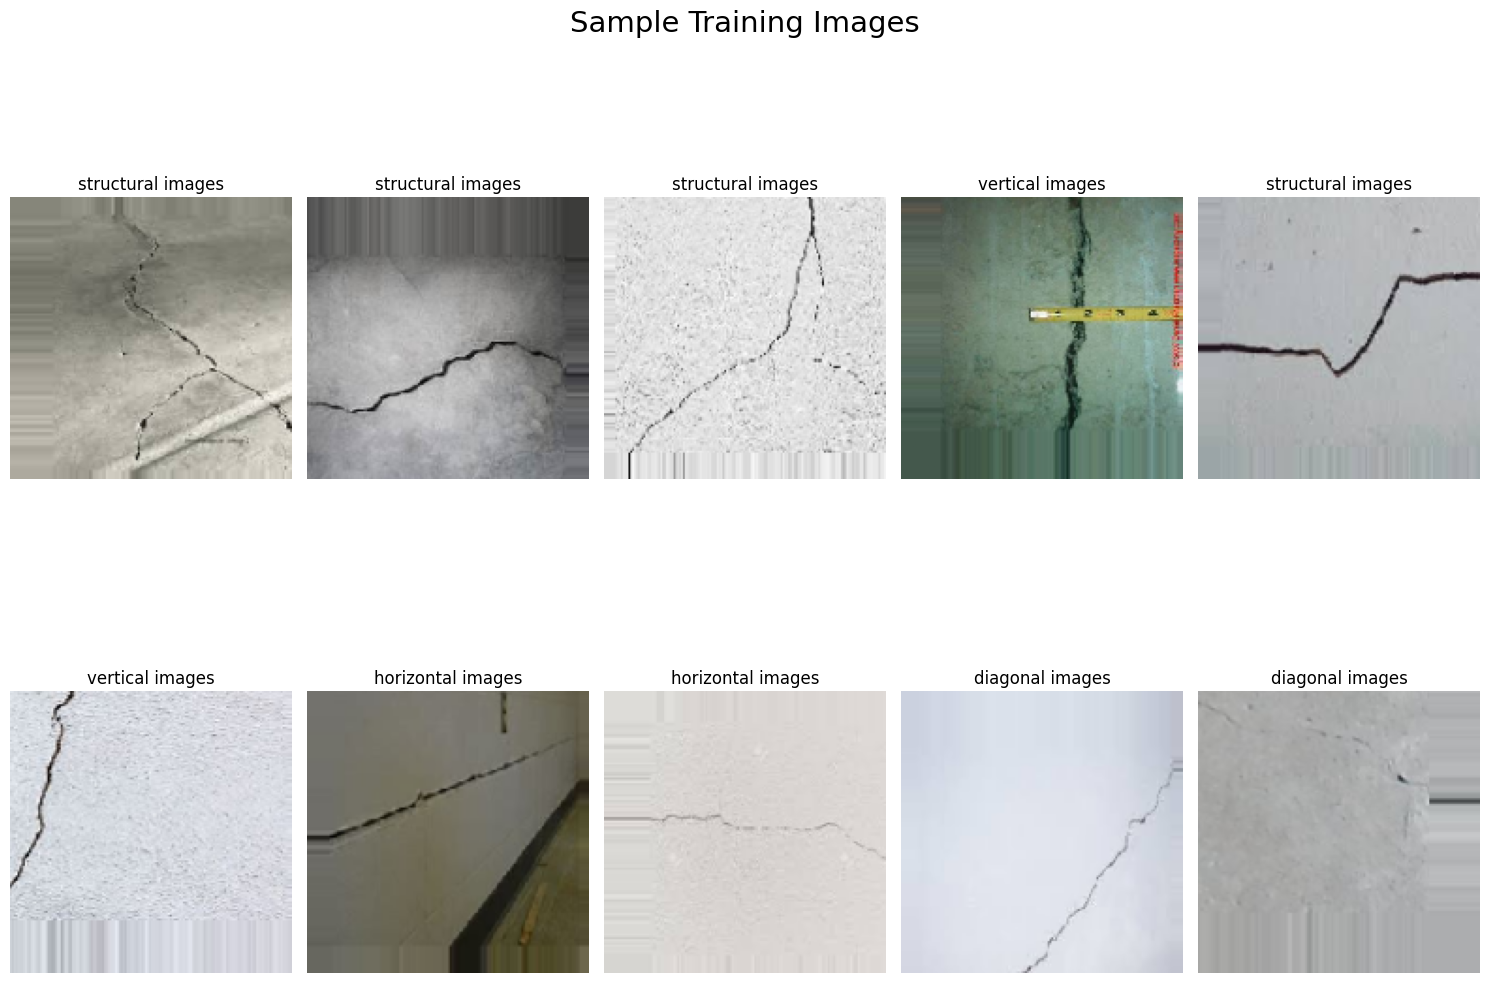

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [18]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])

    return model

In [19]:
cnn_model = create_model()

In [20]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 activation (Activation)     (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 73, 73, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 71, 71, 64)        0

In [21]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [22]:
optimizer = Adam(learning_rate=0.001)

In [23]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model (example)
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [37]:
num_classes = 10

In [38]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [40]:
cnn_model.add(Dense(num_classes, activation='softmax'))


In [45]:
for layer in cnn_model.layers:
    print(layer.output_shape)


In [42]:
from keras import backend as K
K.clear_session()


In [43]:
cnn_model = Sequential()

In [35]:
! pip install keras

In [49]:
epochs = 50

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a specified number of epochs
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=2)



Epoch 1/10
1875/1875 - 34s - loss: 0.1567 - accuracy: 0.9534 - val_loss: 0.0702 - val_accuracy: 0.9787 - 34s/epoch - 18ms/step
Epoch 2/10
1875/1875 - 32s - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0484 - val_accuracy: 0.9832 - 32s/epoch - 17ms/step
Epoch 3/10
1875/1875 - 31s - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0525 - val_accuracy: 0.9829 - 31s/epoch - 16ms/step
Epoch 4/10
1875/1875 - 31s - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0420 - val_accuracy: 0.9864 - 31s/epoch - 17ms/step
Epoch 5/10
1875/1875 - 32s - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0510 - val_accuracy: 0.9857 - 32s/epoch - 17ms/step
Epoch 6/10
1875/1875 - 32s - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0476 - val_accuracy: 0.9859 - 32s/epoch - 17ms/step
Epoch 7/10
1875/1875 - 31s - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0513 - val_accuracy: 0.9856 - 31s/epoch - 16ms/step
Epoch 8/10
1875/1875 - 31s - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0538 - val_accuracy: 0.9852 - 31s/ep